In [19]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [3]:
VIX = pd.read_csv(r"C:\Users\tcern\Downloads\VIX_History.csv", parse_dates=['DATE'])
TenYear = pd.read_csv(r"C:\Users\tcern\Downloads\DGS10.csv", parse_dates=['observation_date'])
SOFR = pd.read_excel(r"C:\Users\tcern\Downloads\SOFR.xlsx", parse_dates=['Effective Date'])
GDP = pd.read_excel(r"C:\Users\tcern\Downloads\GDP.xlsx", parse_dates=['GDP Final*'])
GNI = pd.read_excel(r"C:\Users\tcern\Downloads\GNI.xlsx", parse_dates=['Period'])
GNP = pd.read_excel(r"C:\Users\tcern\Downloads\GNP.xlsx", parse_dates=['Period'])
Unemployment = pd.read_excel(r"C:\Users\tcern\Downloads\Unemployment.xlsx", parse_dates=['Original Release Date'])
CPI = pd.read_excel(r"C:\Users\tcern\Downloads\CPI.xlsx", parse_dates=['Original Release Date'])
PPI = pd.read_excel(r"C:\Users\tcern\Downloads\PPI.xlsx", parse_dates=['Original Release Date'])

C:\Users\tcern\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
VIX.rename(columns={'DATE': 'Date', 'CLOSE': 'Value'}, inplace=True)
TenYear.rename(columns={'observation_date': 'Date', 'DGS10': 'Value'}, inplace=True)
SOFR.rename(columns={'Effective Date': 'Date', 'Rate (%)': 'Value'}, inplace=True)
GDP.rename(columns={'GDP Final*': 'Date', 'GDP Final*.1': 'Value'}, inplace=True)
GNI.rename(columns={'Period': 'Date'}, inplace=True)
GNP.rename(columns={'Period': 'Date'}, inplace=True)
Unemployment.rename(columns={'Original Release Date': 'Date', 'First Release': 'Value'}, inplace=True)
CPI.rename(columns={'Original Release Date': 'Date', 'First Release': 'Value'}, inplace=True)
PPI.rename(columns={'Original Release Date': 'Date'}, inplace=True)
VIX = VIX[VIX['Date'] >= '2015-01-01']

In [7]:
#PPI
def change_calculation(df):
    df['Value'] = (df['First Release'] - df['First Release'].shift(-1))
    df['Value'] = df['Value'].fillna(0)
    return df

PPI = change_calculation(PPI)

#GNI
def pct_change(df):
    df['Value'] = ((df['aUSN0ZGFT'] / df['aUSN0ZGFT'].shift(-1)) - 1) * 100
    df['Value'] = df['Value'].fillna(0)
    return df

GNI = pct_change(GNI)

#GNP
def pct_changee(df):
    df['Value'] = ((df['aUSGNP/A'] / df['aUSGNP/A'].shift(-4)) - 1) * 100
    df['Value'] = df['Value'].fillna(0)
    return df

GNP = pct_changee(GNP)

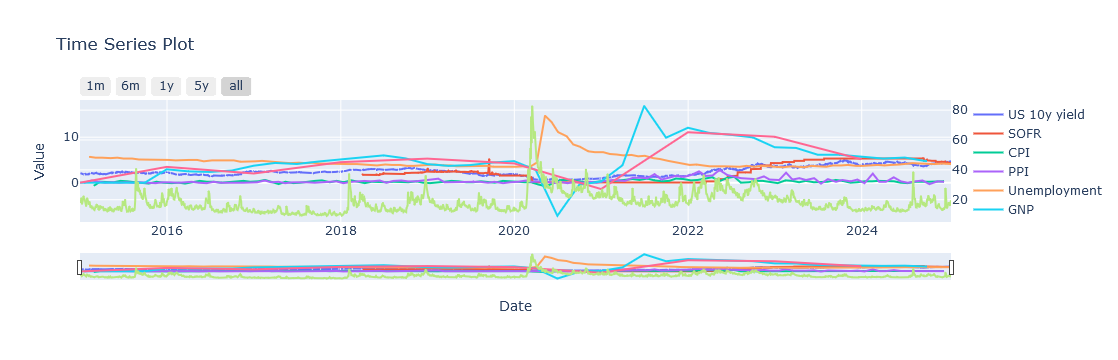

In [25]:
#InteractiveGraph
def plot_timeseries(dfs, titles):
    fig = go.Figure()
    for i, (df, title) in enumerate(zip(dfs, titles)):
        if i == len(dfs) - 1:
            fig.add_trace(go.Scatter(x=df['Date'], y=df['Value'], mode='lines', name=title, yaxis='y2'))
        else:
            fig.add_trace(go.Scatter(x=df['Date'], y=df['Value'], mode='lines', name=title))
    
    fig.update_layout(
        title='Time Series Plot',
        xaxis_title='Date',
        yaxis_title='Value',
        yaxis2=dict(overlaying='y', side='right'),
        xaxis=dict(
            rangeslider=dict(visible=True),
            rangeselector=dict(
                buttons=[
                    dict(count=1, label='1m', step='month', stepmode='backward'),
                    dict(count=6, label='6m', step='month', stepmode='backward'),
                    dict(count=1, label='1y', step='year', stepmode='backward'),
                    dict(count=5, label='5y', step='year', stepmode='backward'),
                    dict(step='all')
                ]
            )
        ),
        yaxis=dict(autorange=True)  #Does not work for some reason
    )
    
    fig.show()

plot_timeseries([TenYear, SOFR, CPI, PPI, Unemployment, GNP, GNI, VIX], ["US 10y yield", "SOFR", "CPI", "PPI", "Unemployment", "GNP", "GNI", "VIX"])

In [23]:
#CorrelationFunction
def correlationfunction(data1, data2, col1, col2):
    merged_data = pd.merge_asof(data1.sort_values('Date'),
                                data2.sort_values('Date'),
                                on='Date')
    correlation = merged_data[[col1, col2]].corr().iloc[0, 1]
    
    return correlation